<h1>Numerical Modelling and Geostatistics<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#The-plan" data-toc-modified-id="The-plan-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>The plan</a></span></li><li><span><a href="#Geostatistics" data-toc-modified-id="Geostatistics-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Geostatistics</a></span></li></ul></li><li><span><a href="#Variograms" data-toc-modified-id="Variograms-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Variograms</a></span></li><li><span><a href="#Realizations" data-toc-modified-id="Realizations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Realizations</a></span></li><li><span><a href="#Response-modeling" data-toc-modified-id="Response-modeling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Response modeling</a></span></li><li><span><a href="#Remarks" data-toc-modified-id="Remarks-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Remarks</a></span></li></ul></div>

by Lutz Gross, The University of Queensland, Australia
<a href="mailto:l.gross@uq.edu.au">l.gross@uq.edu.au</a>
<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.

# Introduction

## The plan
We want to model the gravity profile from a realistic density distribution $m$. 
Realistic means that it follows a statistics in terms of statistical variance $V(M_i)$
as well as spatial correlations expressed in form of covariance $Cov(M_i,M_j)$ where $M_i$ 
represents random variable modeling the density in the cell   


## Geostatistics
Geostatistics deals with spatially variable datasets using statistical methods. A key problem
is the quantification of the dependence of spatial distributed quantities. The following
cartoon explains this: 

<img src="./Figures/GridVariogramDensity.png" width=350>

The density $m_i$ present in each grid cell $i$ is modeled by a random variable $M_i$. 
The fact that the values of the density in the cells are correlated is described 
by the covariance of the respective random variables $M_i$. The spatial distribution of the density
is then controlled by two factors:
 
1. the variance $V(M_i)=s=\sigma^2$ of the density found in each cell. 
2. the distance $h_{ij}$ of the two cells $i$ and $j$ 
3. the degree at which the covariance $Cov(M_i,M_j)=f(h_{ij})$ decreases with distance $h_{ij}$.

We make the additional assumptions that

a. the decreases with distance $h_{ij}$ can be modeled by an exponential model described by 
the *variogram* $\gamma$. 
b. the random variables $M_i$ are Gaussian with same mean $\mu=0$ and the same variance $\sigma^2$ 

For more details see:

 [Kitanidis, P.K. (1997) Introduction to Geostatistics: Applications in Hydrogeology, Cambridge University Press.](https://www.cambridge.org/gb/academic/subjects/earth-and-environmental-science/hydrology-hydrogeology-and-water-resources/introduction-geostatistics-applications-hydrogeology?format=PB&isbn=9780521587471) 

# Variograms
Assume random variables $M_i$ are given at locations $\mathbf{x}_i$.
Think of this as the density at various locations over a given
region. First assumption is that the expected values $E(M_i)$ of the
$M_i$ is independent from the location:
\begin{equation}\label{eqMEan}
E(M_i)=E(M_j)=\mu
\end{equation}
It is assumed that the covariance of $Q_i$ and $Q_j$
is a function of the distance $h_{ij}$ of their locations:
\begin{equation}\label{eqCov}
Cov(M_i,M_j)  = C(h_{ij}) = \mbox{ depends on location distance $h_{kl}$} 
\end{equation}
with cell distance
\begin{equation}\label{eq:dist}
h_{ij} = | \mathbf{x}_i-\mathbf{x}_j|
\end{equation}
For historical reasons a so called variogram $\gamma$ is used
to define the covariance as function of the so called lag $h$.
It is defined as 
\begin{equation}\label{eqGamma}
\gamma(h) =C(0)-C(h) = s-C(h)
\end{equation}
The following image gives an example of a variogram 

<img src="Figures/Variogram.gif">




In [ ]:
%matplotlib notebook

In the following we use the exponential variogram
\begin{equation}\label{eq:expvario}
\gamma(h)= s \cdot (1-  e^{-\frac{3h}{r}})
\end{equation}
where $r$ is called range, $s$ is called sill. The nugget effect is ignored here.
Let's put this into a function `getVarioGram` for later use:

In [1]:
import numpy as np
def getVariogram(h, s, r):
    v=s*(1-np.exp(-3*h/r))
    return v

First thing to do is to plot this variogram for various parameter values.
We start this by creating 100 values of lags `h` between zero and 100 using the
`linspace` function in `numpy`:

In [2]:
h=np.linspace(0, 100., 100)

In [3]:
h.shape, h.min(), h.max()

((100,), 0.0, 100.0)

We feed this into `getVariogram`:

Text(0.5, 1.0, 'Exponential Variogram')

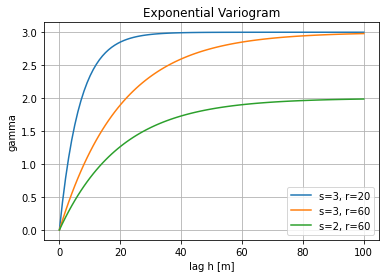

In [4]:
import matplotlib.pyplot as plt
plt.figure()

s, r =3, 20
plt.plot(h, getVariogram(h, s, r), label=f"s={s}, r={r}") 

s, r=3, 60
plt.plot(h, getVariogram(h, s, r), label=f"s={s}, r={r}")

s, r =2, 60
plt.plot(h, getVariogram(h, s, r), label=f"s={s}, r={r}")

plt.xlabel("lag h [m]")
plt.ylabel("gamma")
plt.grid(True)
plt.legend()
plt.title("Exponential Variogram")

Text(0.5, 1.0, 'Covariance')

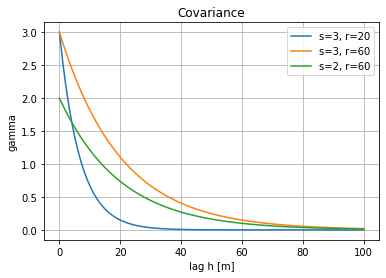

In [5]:
plt.figure()

s, r =3, 20
plt.plot(h, s-getVariogram(h, s, r), label=f"s={s}, r={r}") 

s, r=3, 60
plt.plot(h, s-getVariogram(h, s, r), label=f"s={s}, r={r}")

s, r =2, 60
plt.plot(h, s-getVariogram(h, s, r), label=f"s={s}, r={r}")

plt.xlabel("lag h [m]")
plt.ylabel("gamma")
plt.grid(True)
plt.legend()
plt.title("Covariance")

Sampling:

In [6]:
X0, X1=1000, 1100

In [7]:
cov=np.zeros((2,2))

In [8]:
s, r=50**2, 2000

In [9]:
cov[0,0]=s
cov[1,1]=s

In [10]:
h=abs(X1-X0)
cov[1,0]=s-getVariogram(h, s, r)
cov[0,1]=s-getVariogram(h, s, r)

In [11]:
cov

array([[2500.        , 2151.76994106],
       [2151.76994106, 2500.        ]])

In [12]:
M=np.random.multivariate_normal([0,0], cov, size=500)

In [13]:
M.shape

(500, 2)

In [14]:
M

array([[-2.82142773e+01, -2.23963359e+01],
       [ 2.27005105e+01,  3.46998532e+01],
       [-6.28990067e+01, -2.17042418e+01],
       [-3.52818437e+01, -3.89698613e+01],
       [-3.51596391e+01, -6.82568582e+01],
       [ 4.97718163e+01,  9.08149545e+01],
       [ 1.98321164e+01,  5.05711366e+01],
       [ 3.27135038e+01,  5.07768333e+01],
       [ 3.91988987e+01,  5.17322001e+01],
       [ 7.52228398e+01,  5.01739919e+01],
       [ 3.07218370e+01,  3.60857357e+01],
       [ 3.78203429e+00,  1.50581869e+01],
       [ 5.07219188e+01,  5.19623652e+01],
       [-3.77658864e+01, -6.90619030e+01],
       [ 9.95073422e+01,  8.55989720e+01],
       [-1.03774308e+02, -8.87479546e+01],
       [-4.22870928e+01, -2.39724853e+01],
       [-2.13789267e+01, -6.19779220e+01],
       [ 4.20875668e+01,  5.49776297e+01],
       [-1.63718137e+01, -1.31947942e+00],
       [-6.91194008e+01, -1.00072176e+02],
       [-2.61832523e+01,  3.20410944e+01],
       [-1.37883450e+02, -1.59832601e+02],
       [ 6.

Text(0.5, 1.0, 'density at X1 sill =2500 and range 2000')

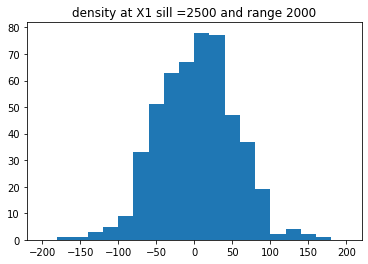

In [15]:
plt.hist(M[:,0], 20, range=[-200,200])
plt.title(f"density at X1 sill ={s} and range {r}")

Text(0.5, 1.0, 'covariance between X1  and X0 sill =2500 and range 2000')

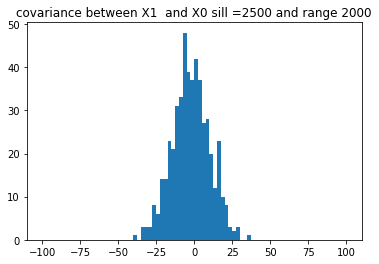

In [16]:
M01=(M[:,0]-M[:,1])/2
plt.hist(M01, 80, range=[-100,100])
plt.title(f"covariance between X1  and X0 sill ={s} and range {r}")

In [17]:
getVariogram(h, s,r)**0.5

18.66092331417059

# Realizations
A first interesting question is how would possible realization of random variables
following a variogram. We will draw random samples from a multivariate normal distribution.  The multivariate normal, multinormal or Gaussian distribution is a generalization of the one-dimensional normal distribution to higher dimensions. Such a distribution is specified by its mean and covariance matrix which we need to construct from a variogram. These parameters are analogous to the mean (average or “center”) and variance (standard deviation, or “width,” squared) of the one-dimensional normal distribution.
We use the function [`multivariate_normal`](https://numpy.org/devdocs/reference/random/generated/numpy.random.Generator.multivariate_normal.html#numpy.random.Generator.multivariate_normal) from `numpy`.

First we need to define locations over at which we want to construct realizations: here we assume a domain of horizontal extend of $50km$ and a vertical extend of $25km$:

In [18]:
Lx, Lz=50000, 25000

We generate positions of horizontal ('x') and vertical ('z') grid lines:

In [19]:
xline=np.linspace(0, Lx, 71)
zline=np.linspace(0, Lz, 36)


In [20]:
zline

array([    0.        ,   714.28571429,  1428.57142857,  2142.85714286,
        2857.14285714,  3571.42857143,  4285.71428571,  5000.        ,
        5714.28571429,  6428.57142857,  7142.85714286,  7857.14285714,
        8571.42857143,  9285.71428571, 10000.        , 10714.28571429,
       11428.57142857, 12142.85714286, 12857.14285714, 13571.42857143,
       14285.71428571, 15000.        , 15714.28571429, 16428.57142857,
       17142.85714286, 17857.14285714, 18571.42857143, 19285.71428571,
       20000.        , 20714.28571429, 21428.57142857, 22142.85714286,
       22857.14285714, 23571.42857143, 24285.71428571, 25000.        ])

Create the grid points:

In [21]:
xg, zg = np.meshgrid(xline, zline)

We straighten the grid locations `xg` and `yg` into 1D arrays so we can easily calculate grid node differences:

In [22]:
xx=xg.flatten()
zz=zg.flatten()

In [23]:
xg.shape, xx.shape

((36, 71), (2556,))

In [24]:
xg.reshape((2556,))

array([    0.        ,   714.28571429,  1428.57142857, ...,
       48571.42857143, 49285.71428571, 50000.        ])

**note**: Node $x_i$ has coordinates (`xx[i]`, `zz[i]`).

Now we create the matrix of lags `h` between the random variable positions:

In [25]:
h=np.zeros( (len(xx), len(xx)) )
for i in range(len(xx)):
    # take grid point i at (xx[i], yy[i])
    # array of distance to the other points
    hi=np.sqrt((xx[i]-xx)**2 + (zz[i]-zz)**2)
    h[i,:]=hi

In [26]:
h[0,0], h[0,1], h[0,2], h[0,3]

(0.0, 714.2857142857143, 1428.5714285714287, 2142.857142857143)

**Note** `h[i,j]` is now the distance of node $\mathbf{x}_i$ and  $\mathbf{x}_j$

Let's have quick look how the lag matrix look like:

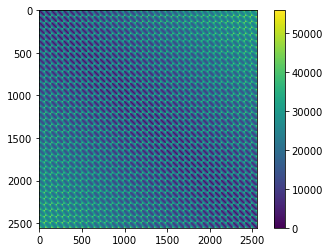

In [27]:
plt.imshow(h)
plt.colorbar()

We create the covariance matrix from `h` for 
sill `50^2` and range $2km$:

In [28]:
s,r = 50**2, 20000

In [29]:
cov=s-getVariogram(h, s, r)

In [30]:
cov.shape, 71*36

((2556, 2556), 2556)

Assuming mean zero we can feed this covariance matrix into the
multivariate normal sampler (this takes some time). We use the function [`multivariate_normal`](https://numpy.org/devdocs/reference/random/generated/numpy.random.Generator.multivariate_normal.html#numpy.random.Generator.multivariate_normal) from `numpy`.

In [31]:
mean=np.zeros((len(xx),))
random_rho=np.random.multivariate_normal(mean, cov, size=1)

In [32]:
random_rho.shape

(1, 2556)

We need to reshape this to a grid for plotting:

In [37]:
rhog=random_rho.reshape( xg.shape )

and then we can plot this using `imshow`. We want have `rhog[0,0]` by at the lower left corner.

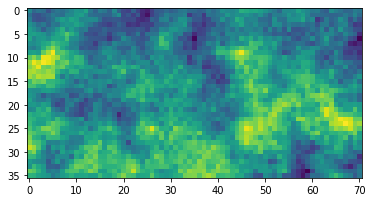

In [38]:
plt.imshow(rhog)

Now we try a variogram with a larger range which should show a smoother distribution. We set range to $20km$. 

In [ ]:
s, r=50**2, 20000

Sample again:

# Response modeling

The `esys-escript` package is used to model the vertical gravity signal across a transect, see <a href="05_NumericalModeling.ipynb">Numerical Modelling</a>.



In [33]:
from esys.escript import *
from esys.finley import Rectangle

We create a 350 x 350 mesh over the domain of width $50km$ = `Lx` and height $50km$ = `2*Lz`:

Again we use the `GravityModel` class to calculate the vertical gravity:

In [34]:
NE=350
domain=Rectangle(l0=Lx, l1=2*Lz, n0=NE, n1=NE)

We need to generate a density distribution over the entire domain where the subsurface is a random realization following a given variogram and above the surface in the air layer density is zero. 
In the air layer we will gather the vertical gravity along a transect. To simplify the set-up we assume that the airlayer has the same height as the subsurface domain.

<img src="./Figures/RandomDensityModel.png" width="50%" height="auto">

In the first step we create a `numpy` array that includes the realization from `random.multivariate_normal` for the bottom part and zero for the top part. We use the function [`concatenate`](https://numpy.org/devdocs/reference/generated/numpy.concatenate.html) from `numpy` to combine the density realization with an appropriate array of zeros:


In [39]:
table_rho=np.concatenate((rhog, np.zeros((zline.shape[0]-1, xline.shape[0]))), axis=0)

Let's take a look at the result:

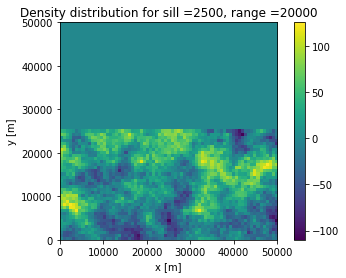

In [40]:
plt.figure()
plt.imshow(table_rho, extent =(0., Lx, 0., 2*Lz), origin= 'lower')
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.title(f"Density distribution for sill ={s}, range ={r}")
plt.colorbar()

Next step is to interpolate this table of densities to the `esys-escript` mesh. For this we need to get the locations `x` in the domain and define the table dimension; this is the origin `(0,0)` and
the grid spacing `(xstep, zstep)`:

In [41]:
x=domain.getX()
xstep=xline[1]-xline[0]
zstep=zline[1]-zline[0]

rho=interpolateTable(table_rho, x, (0., 0,), (xstep, zstep), 1e99)

Lets lake a look at the result:

In [42]:
#from tools import convertToNumpy # ACTIVATE THIS  convertToNumpy call fails.
rho_np=convertToNumpy(rho)
x_np=convertToNumpy(rho.getX())

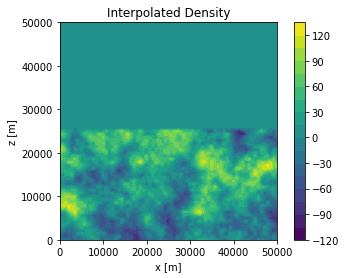

In [43]:
plt.figure()
contour=plt.tricontourf(x_np[0], x_np[1], rho_np[0], 15)
plt.xlabel('x [m]')
plt.ylabel('z [m]')
plt.title("Interpolated Density")
plt.colorbar(contour)
plt.gca().set_aspect('equal')

Hand over to the gravity model:

In [46]:
from esys.downunder.apps import GravityModel
model=GravityModel(domain)
model.setDensity(rho)
gz=model.getGravityVector()[1]

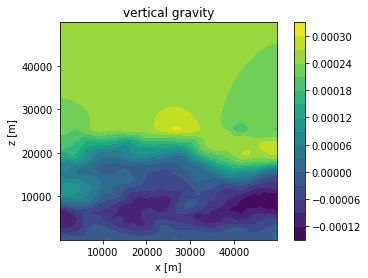

In [49]:
gz_np=convertToNumpy(gz)
x_np=convertToNumpy(gz.getX())

plt.figure()
contour=plt.tricontourf(x_np[0], x_np[1], gz_np[0], 15)
plt.xlabel('x [m]')
plt.ylabel('z [m]')
plt.title("vertical gravity")
plt.colorbar(contour)
plt.gca().set_aspect('equal')

Get the vertical gravity field:

Create a transect offset:

In [50]:
dx=Lx/NE
x_trans=np.linspace(dx/2, dx*NE-dx/2, num=NE, endpoint=True)

Set into offsets into the 2D domain by adding `H0` as z=x0 coordinate:

In [54]:
H0=25500. # height above bottom of the domain
locations_in_transect=[ [x, H0] for x in x_trans ]

Grab the vertical density along the transect usinng the `Locator` class:

In [55]:
from esys.escript.pdetools import Locator
locator=Locator(where=gz.getFunctionSpace(), x=locations_in_transect)
mgal=1e-5
gz_transect=locator.getValue(gz/mgal)

Plot the profile:

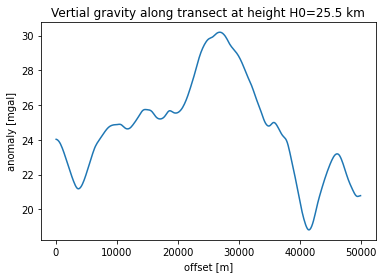

In [56]:
plt.figure()
plt.plot([x[0] for x in locator.getX()], gz_transect)
plt.xlabel('offset [m]')
plt.ylabel('anomaly [mgal]')
plt.title("Vertial gravity along transect at height H0=%s km"%(H0/1000.))
plt.show()

# Remarks

- `random.multivariate_normal` is not the best way to create realizations following a variogram
- you can integrate this into an inversion based on the Metropolis–Hastings algorithm plus Bayesian posterior. 
- Looking under the hood of `GravityModel`: see  <a href="Y00_EscriptBasics.ipynb">esys-escript basics</a> notebook.